# Classification

### Perception

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import pandas as pd
mpl.style.use('classic')

In [17]:
df=pd.DataFrame({'sleep_proportion':[0.2,0.4,0.5,0.7,0.8,0.6],
                'grumpy_proportion':[0.1,0.6,0.2,0.9,0.9,0.7],
                 'prediction':['kitten','kitten','kitten','adult','adult','adult']})
# df=pd.DataFrame({'sleep_proportion':[0.2,0.4,0.5,0.7],
#                 'grumpy_proportion':[0.1,0.6,0.2,0.9],
#                  'prediction':['kitten','kitten','kitten','adult']})
# df.head()


In [18]:
kat=df[df['prediction']=='kitten']
cat=df[df['prediction']=='adult']

In [19]:
kat

,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.1,kitten
1,0.4,0.6,kitten
2,0.5,0.2,kitten


In [20]:
cat

,sleep_proportion,grumpy_proportion,prediction
3,0.7,0.9,adult
4,0.8,0.9,adult
5,0.6,0.7,adult


In [21]:
df['bprediction'] = df['prediction'].apply(lambda x: x=='kitten')
df

,sleep_proportion,grumpy_proportion,prediction,bprediction
0,0.2,0.1,kitten,True
1,0.4,0.6,kitten,True
2,0.5,0.2,kitten,True
3,0.7,0.9,adult,False
4,0.8,0.9,adult,False
5,0.6,0.7,adult,False


In [22]:
from sklearn.linear_model import Perceptron
classifier=Perceptron(max_iter=1000)
cmodel=classifier.fit(df[['sleep_proportion','grumpy_proportion']],df['bprediction'])
print(cmodel.predict([[0.8,0.6]]))
print(cmodel.predict([[0.8,0.6],[0.2,0.5]]))

[False]
[False  True]


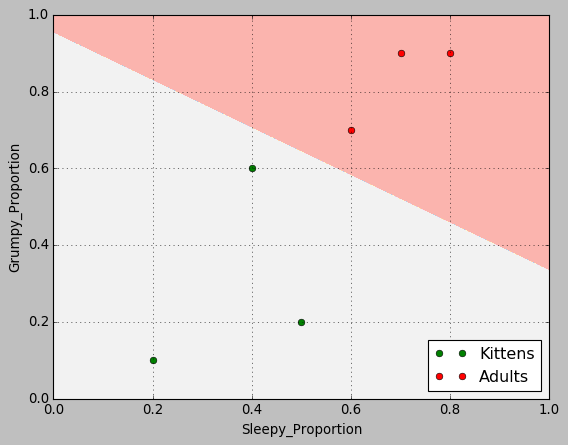

In [23]:
import numpy as np
#Refrence of our mapping
plt.plot(kat["sleep_proportion"],kat["grumpy_proportion"],'og',label='Kittens',alpha=1)
plt.plot(cat["sleep_proportion"],cat["grumpy_proportion"],'or',label='Adults')
plt.axis([0,1,0,1])
plt.xlabel("Sleepy_Proportion")
plt.ylabel("Grumpy_Proportion")
plt.grid()
plt.legend(loc=4)
x_min,x_max=0,1
y_min,y_max=0,1
ary1= np.arange(x_min,x_max,0.001)
ary2= np.arange(y_min,y_max,0.001)
#-----------------------------------------
#MESH GRID
xx,yy=np.meshgrid(ary1,ary2)
xx_lin=xx.ravel()
yy_lin=yy.ravel()
c_xy=np.c_[xx_lin,yy_lin]#combining xx and yy
z = cmodel.predict(c_xy)#predict the range of predictions
z=z.reshape(xx.shape)#reshaping  as the shape of xx

#------------------------------------------
#Contour fills the area. It requires 2 dim array
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
#------------------------------------------

# Confusion Matrix

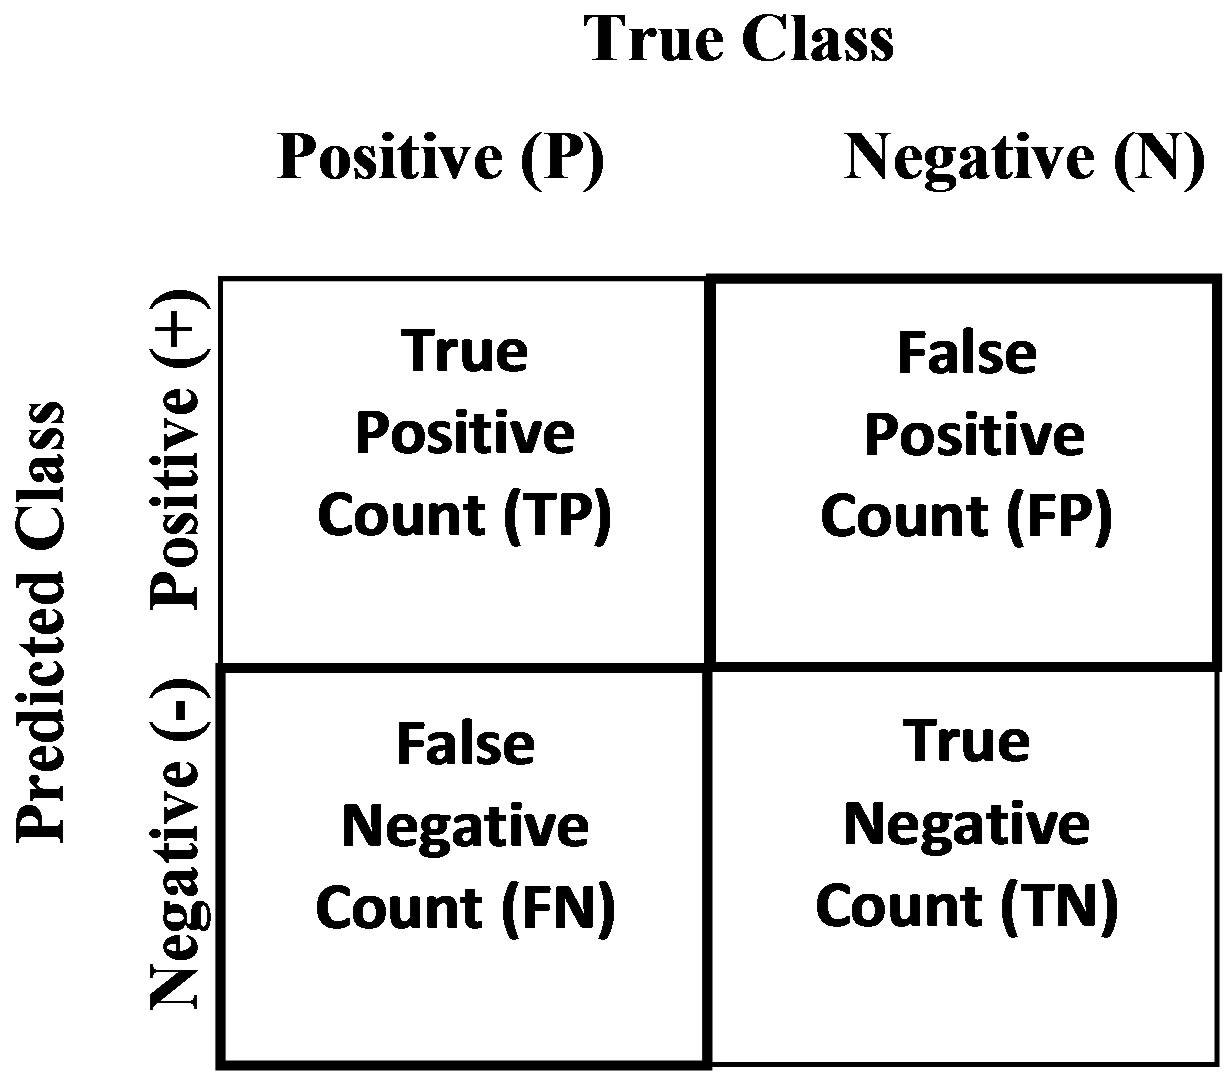

In [46]:
from IPython.display import Image
Image(filename='data/confusionMat.jpg') 

In [71]:
from sklearn.metrics import confusion_matrix
actual = df['bprediction']
pred = cmodel.predict(df[['sleep_proportion','grumpy_proportion']])
confusion_matrix(actual,pred)

array([[3, 0],
       [0, 3]], dtype=int64)

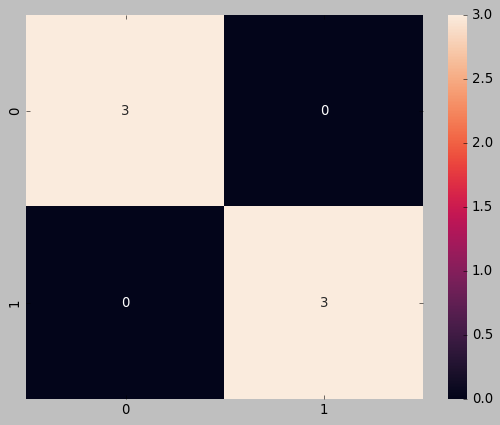

In [69]:
import seaborn as sb
from sklearn import metrics
sb.heatmap(metrics.confusion_matrix(actual,pred),annot=True)# annotation is the text inside the mapping

In [70]:
from sklearn.metrics import classification_report
print(classification_report(actual,pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         3
        True       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



- precision = TP/TP+FP (Kittens)
- precision = TN/TN+FN (Adults)
- recall = TP/TP+FN (Kittens)
- recall = TN/TN+FP(Dog)
F1-Score = 2*(Precision * recall / Precision + recall)

In [83]:
from sklearn.metrics import confusion_matrix
acual = np.array(['Dog','Cat','Dog','Dog','Dog','Cat','Cat'])
pred  = np.array(['Dog','Cat','Cat','Dog','Cat','Cat','Cat'])
print(confusion_matrix(acual,pred))
print(classification_report(acual,pred))

[[3 0]
 [2 2]]
              precision    recall  f1-score   support

         Cat       0.60      1.00      0.75         3
         Dog       1.00      0.50      0.67         4

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7

